In [58]:
import numpy as np
import scipy as sp
import scipy.linalg
from matplotlib import pyplot as plt
from matplotlib import patches as p

In [96]:
def mu(z, a, b):
    return a**3*z + b**2*z**2 + a**2*b**3*z

def mu_a(z, a, b):
    return 3*a**2*z + 2*a*b**3*z

def mu_b(z, a, b):
    return 6*a**z + 2*b**3*z

def mu_aa(z, a, b):
    return 6*a*z + 2*b**3*z

def mu_ab(z, a, b):
    return 6*a*b**2*z

def mu_ba(z, a, b):
    return 6*a*b**2*z

def mu_bb(z, a, b):
    return 2*z**2 + 6*a**2*b*z

In [69]:
n = 2
s = 0.1
C = np.array([[s, s**2],
              [s**2, s]])
M = np.linalg.inv(C)
a = 2
b = 4
start = 0
stop = 2
z = np.linspace(start, stop, n*n)
z = z.reshape((n,n))

In [70]:
model = mu(z, a, b)
F = np.matmul(mu_a(z, a, b), M)
F = np.matmul(F, mu_b(z, a, b))
F_inv = np.linalg.inv(F)
S = np.matmul(mu_aa(), )

In [71]:
def confidence(C, ax, mean=[0,0]):
    x_var = np.sqrt((C[0,0] + C[1,1])/2 + np.sqrt((C[0,0] - C[1,1])**2/4 + (C[0,1])**2))
    y_var = np.sqrt((C[0,0] + C[1,1])/2 - np.sqrt((C[0,0] - C[1,1])**2/4 + (C[0,1])**2))
    alpha = [1.52, 2.48, 3.44]
    theta = (np.arctan((2*C[0,1])/(C[0,0] - C[1,1])))/2 * 180/np.pi
    colors = ['black', 'gray', 'pink']
    labels = ['$1\sigma$', '$2\sigma$', '$3\sigma$']
    for i in range(len(alpha)):
        ax.add_patch(p.Ellipse(mean, alpha[i]*x_var, alpha[i]*y_var, angle=theta, facecolor='none', 
                               edgecolor=colors[i], label=labels[i], linewidth=1.5))
    return x_var, y_var, alpha, theta

def plot_confidence(C, a, b, mean=[0,0], figsize=6, xlim=0.1, ylim=0.1, 
                    figname='avb'+str(a)+','+str(b)+'.png'):
    fig, ax = plt.subplots(figsize=(figsize, figsize))
    x_var, y_var, alpha, theta = confidence(C, ax, mean=(a,b))
    ax.set_xlim((a-xlim**2,a+xlim**2))
    ax.set_ylim((b-ylim**2,b+ylim**2))
    ax.set_xlabel('a')
    ax.set_ylabel('b')
    ax.legend()
    plt.title('a vs b Probability Space', size=16)
    plt.savefig(figname, bbox_inches='tight')

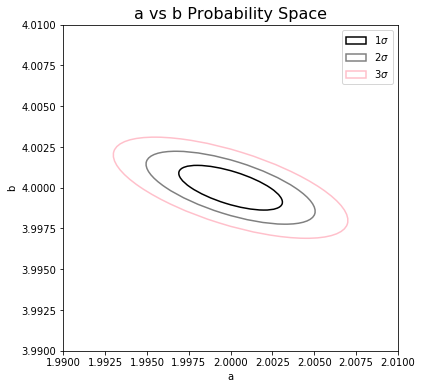

In [95]:
r = 3
fig, ax = plt.subplots(figsize=(2*r,2*r))
x_var, y_var, alpha, theta = confidence(F_inv, ax, mean=(a,b))
ax.set_xlim((a-s**2,a+s**2))
ax.set_ylim((b-s**2,b+s**2))
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.legend()
plt.title('a vs b Probability Space', size=16)
plt.savefig('avb.png', bbox_inches='tight')

In [74]:
sp.linalg.expm(F_inv)

array([[ 1.00001659e+00, -4.74837520e-06],
       [-9.31018790e-06,  1.00000325e+00]])

In [110]:
gauss = np.random.multivariate_normal(mean=(a,b), cov=F_inv, size=10**4)

/Users/hansen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  """Entry point for launching an IPython kernel.


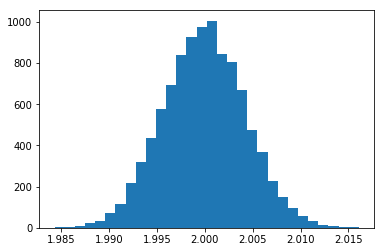

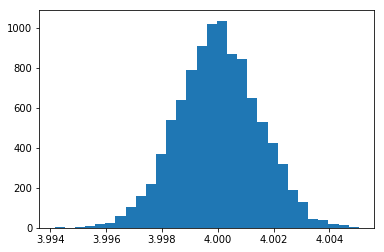

In [121]:
plt.hist(gauss[:,0],bins=30)
plt.show()
plt.hist(gauss[:,1],bins=30)
plt.show()

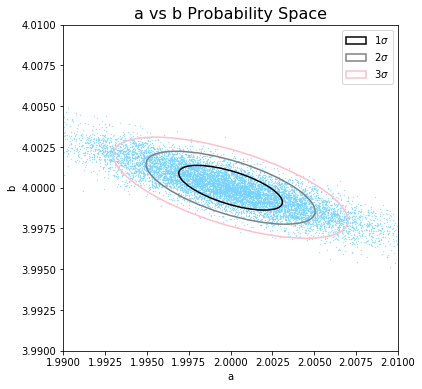

In [115]:
r = 3
fig, ax = plt.subplots(figsize=(2*r,2*r))
x_var, y_var, alpha, theta = confidence(F_inv, ax, mean=(a,b))
ax.scatter(gauss[:,0], gauss[:,1], s=s, color='#72d3fe')
ax.set_xlim((a-s**2,a+s**2))
ax.set_ylim((b-s**2,b+s**2))
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.legend()
plt.title('a vs b Probability Space', size=16)
plt.savefig('avb.png', bbox_inches='tight')

/Users/hansen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


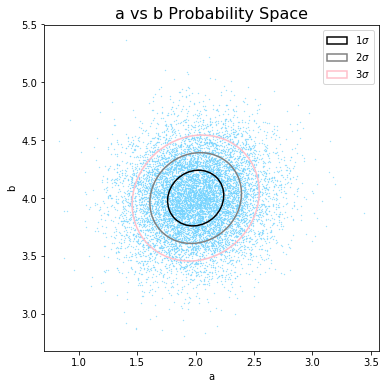

In [131]:
gauss = np.random.multivariate_normal(mean=(a,b), cov=C, size=10**4)
r = 3
fig, ax = plt.subplots(figsize=(2*r,2*r))
x_var, y_var, alpha, theta = confidence(C, ax, mean=(a,b))
ax.scatter(gauss[:,0], gauss[:,1], s=s, color='#72d3fe')
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.legend()
plt.title('a vs b Probability Space', size=16)
plt.savefig('avb2.png', bbox_inches='tight')